# Yolov3 Model

In [124]:
#### importing libraries
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

In [125]:
# Define YOLO model for classification
def yolo_classification_model(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    output = layers.Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    return model


In [126]:
# Path to your dataset directory
dataset_dir = r"F:\Projects (2023-24)\Machine Parts Defection\casting_data\casting_data\grayscale_augmented"


In [127]:
# Define image size and batch size
image_size = (64, 64)
batch_size = 64

# Load and preprocess the dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataset_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset='training',
    seed=123
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataset_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset='validation',
    seed=123
)



Found 6633 files belonging to 2 classes.
Using 5307 files for training.
Found 6633 files belonging to 2 classes.
Using 1326 files for validation.


In [128]:
# Define loss function and metrics
loss_function = tf.keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']


In [129]:
# Create and compile the model
input_shape = image_size + (3,)  # Input shape of your images
num_classes = len(train_dataset.class_names)  # Number of classes in your dataset
model = yolo_classification_model(input_shape, num_classes)
model.compile(optimizer='adam', loss=loss_function, metrics=metrics)


In [130]:
# Train the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=20)


Epoch 1/20
83/83 [==============================] - 351s 4s/step - loss: 0.2821 - accuracy: 0.8967 - val_loss: 5.0068 - val_accuracy: 0.4457
Epoch 2/20
83/83 [==============================] - 269s 3s/step - loss: 0.0466 - accuracy: 0.9836 - val_loss: 0.1652 - val_accuracy: 0.9683
Epoch 3/20
83/83 [==============================] - 274s 3s/step - loss: 0.0425 - accuracy: 0.9855 - val_loss: 3.5249 - val_accuracy: 0.5641
Epoch 4/20
83/83 [==============================] - 277s 3s/step - loss: 0.0452 - accuracy: 0.9845 - val_loss: 0.0561 - val_accuracy: 0.9864
Epoch 5/20
83/83 [==============================] - 279s 3s/step - loss: 0.0341 - accuracy: 0.9887 - val_loss: 2.4561 - val_accuracy: 0.7202
Epoch 6/20
83/83 [==============================] - 285s 3s/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0298 - val_accuracy: 0.9894
Epoch 7/20
83/83 [==============================] - 295s 4s/step - loss: 0.0311 - accuracy: 0.9894 - val_loss: 8.0018 - val_accuracy: 0.5762
Epoch 8/20
83

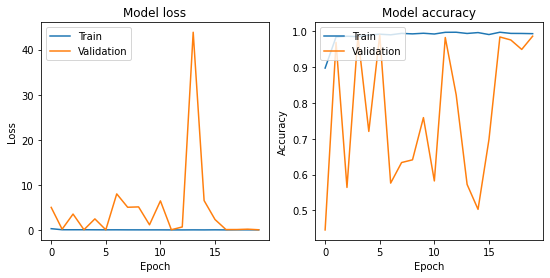

In [193]:
plt.figure(figsize=(9, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [198]:
# Evaluate the model
evaluation = model.evaluate(validation_dataset)
print("Validation Accuracy:", evaluation[1])

# Save the model
model.save("yolo_classification_model.h5")
print("Model saved successfully.")


21/21 [==============================] - 13s 574ms/step - loss: 0.0406 - accuracy: 0.9857
Validation Accuracy: 0.9856711626052856
Model saved successfully.


In [203]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataset_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    subset='validation',  
    seed=456
)


Found 6633 files belonging to 2 classes.
Using 1326 files for validation.


In [152]:
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)


In [155]:
# Load and preprocess the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataset_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    seed=123,
    subset=None  
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Found 6633 files belonging to 2 classes.
104/104 [==============================] - 57s 545ms/step - loss: 0.0348 - accuracy: 0.9878
Test Loss: 0.034805309027433395
Test Accuracy: 0.9877883195877075


1/1 [==============================] - 12s 12s/step
Predicted result is Normal


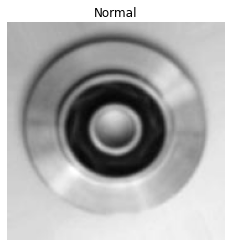

In [200]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the model
model = load_model('yolo_classification_model.h5')

# Path to the test image
test_image_path = 'cast_ok_0_12.jpeg'

# Load and preprocess the image
test_image = load_img(test_image_path, target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Get the class probabilities using the model
result = np.argmax(model.predict(test_image))

# Interpret the result
if result == 0:
    prediction = "Defected"
elif result == 1:
    prediction = "Normal"
else:
    prediction = "Unexpected result"

print("Predicted result is", prediction)

# Visualize the image
image = cv2.imread(test_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
plt.imshow(image)
plt.axis('off')
plt.title(prediction)
plt.show()


1/1 [==============================] - 5s 5s/step
Predicted result is Defected


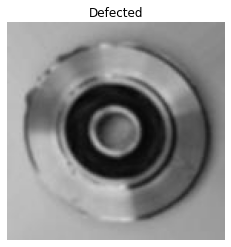

In [201]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the model
model = load_model('yolo_classification_model.h5')

# Path to the test image
test_image_path = 'cast_def_0_19.jpeg'

# Load and preprocess the image
test_image = load_img(test_image_path, target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Get the class probabilities using the model
result = np.argmax(model.predict(test_image))

# Interpret the result
if result == 0:
    prediction = "Defected"
elif result == 1:
    prediction = "Normal"
else:
    prediction = "Unexpected result"

print("Predicted result is", prediction)

# Visualize the image
image = cv2.imread(test_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
plt.imshow(image)
plt.axis('off')
plt.title(prediction)
plt.show()


# RNN Model

In [140]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [141]:
# Define a simple RNN model for processing images for classification
class ImageRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ImageRNN, self).__init__()
        self.hidden_size = hidden_size
        self.conv = nn.Conv2d(input_size, hidden_size, kernel_size=3, padding=1) 
        self.rnn = nn.RNN(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        batch_size = x.size(0)
        
        # Apply convolutional layer
        x = self.conv(x)
        
        # Reshape the output of convolution to match RNN input shape
        x = x.view(batch_size, -1, self.hidden_size)
        
        h0 = torch.zeros(1, batch_size, self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # Use the output of the last time step
        return out

In [142]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define dataset path and transforms
dataset_path = r"F:\Projects (2023-24)\Machine Parts Defection\casting_data\casting_data\grayscale_augmented"
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor(),         # Convert images to tensors
])


In [143]:
# Load dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split dataset into train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])


In [144]:

# Define dataloaders
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [145]:

# Define model
input_size = 3  
hidden_size = 64
output_size = len(dataset.classes)  # Number of classes
rnn_model = ImageRNN(input_size=input_size, hidden_size=hidden_size, output_size=output_size).to(device)


In [146]:

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.001)


In [147]:
# Training loop
num_epochs = 20
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    rnn_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = rnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    epoch_loss = running_loss / len(train_dataset)
    train_accuracy = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(train_accuracy)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.2%}")

Epoch [1/20], Train Loss: 0.6600, Train Accuracy: 60.42%
Epoch [2/20], Train Loss: 0.6385, Train Accuracy: 63.66%
Epoch [3/20], Train Loss: 0.6035, Train Accuracy: 67.45%
Epoch [4/20], Train Loss: 0.5930, Train Accuracy: 68.34%
Epoch [5/20], Train Loss: 0.5678, Train Accuracy: 69.81%
Epoch [6/20], Train Loss: 0.5567, Train Accuracy: 70.67%
Epoch [7/20], Train Loss: 0.5292, Train Accuracy: 73.12%
Epoch [8/20], Train Loss: 0.5657, Train Accuracy: 69.88%
Epoch [9/20], Train Loss: 0.5127, Train Accuracy: 73.43%
Epoch [10/20], Train Loss: 0.5079, Train Accuracy: 74.73%
Epoch [11/20], Train Loss: 0.5244, Train Accuracy: 73.11%
Epoch [12/20], Train Loss: 0.4739, Train Accuracy: 76.76%
Epoch [13/20], Train Loss: 0.4788, Train Accuracy: 76.74%
Epoch [14/20], Train Loss: 0.4493, Train Accuracy: 78.18%
Epoch [15/20], Train Loss: 0.4548, Train Accuracy: 77.61%
Epoch [16/20], Train Loss: 0.4175, Train Accuracy: 80.23%
Epoch [17/20], Train Loss: 0.3990, Train Accuracy: 81.36%
Epoch [18/20], Train Lo

In [148]:

# After training loop, evaluate the model
test_loss, test_accuracy, test_precision, test_recall, test_f1, test_labels, test_predictions, test_probs = evaluate_model(rnn_model, test_dataloader, criterion, device)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")
print(f"Test Precision: {test_precision:.2%}")
print(f"Test Recall: {test_recall:.2%}")
print(f"Test F1 Score: {test_f1:.2%}")


Test Loss: 0.3860
Test Accuracy: 83.42%
Test Precision: 84.84%
Test Recall: 83.42%
Test F1 Score: 83.44%


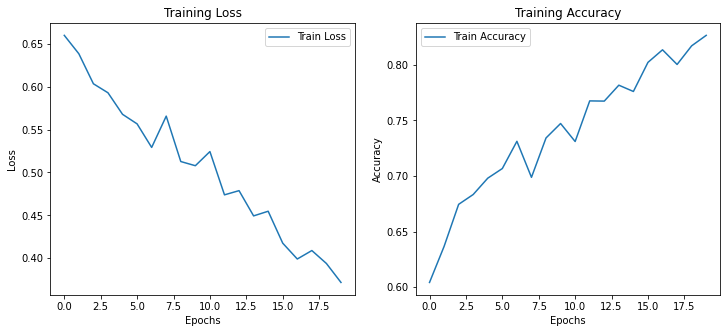

In [149]:

# Plotting training loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()

In [194]:
model.save('rnn_model.h5')

In [195]:
import os
import numpy as np
from django.shortcuts import render, redirect, get_object_or_404
from django.core.files.storage import FileSystemStorage
from django.http import HttpResponse
from django.contrib import messages
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model

# Load the model
model = load_model('rnn_model.h5')

# Path to the test image
test_image_path = 'cast_ok_0_12.jpeg'

# Load and preprocess the image
test_image = load_img(test_image_path, target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Get the class probabilities using the model
result = np.argmax(model.predict(test_image))

# Interpret the result
if result == 0:
    print("Predicted result is defected")
elif result == 1:
    print("Predicted result is Normal")
else:
    print("Unexpected result")


1/1 [==============================] - 5s 5s/step
Predicted result is Normal


In [196]:
import os
import numpy as np
from django.shortcuts import render, redirect, get_object_or_404
from django.core.files.storage import FileSystemStorage
from django.http import HttpResponse
from django.contrib import messages
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model

# Load the model
model = load_model('rnn_model.h5')

# Path to the test image
test_image_path = 'cast_def_0_19.jpeg'

# Load and preprocess the image
test_image = load_img(test_image_path, target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Get the class probabilities using the model
result = np.argmax(model.predict(test_image))

# Interpret the result
if result == 0:
    print("Predicted result is defected")
elif result == 1:
    print("Predicted result is Normal")
else:
    print("Unexpected result")


1/1 [==============================] - 2s 2s/step
Predicted result is defected
